[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
[('average', 3737), ('good', 3179), ('rated', 2148), ('excellent', 301), ('poor', 186)]
Total Positive Word Count: 3480
Total Negative Word Count: 186
Average Review Length: 1.00 words


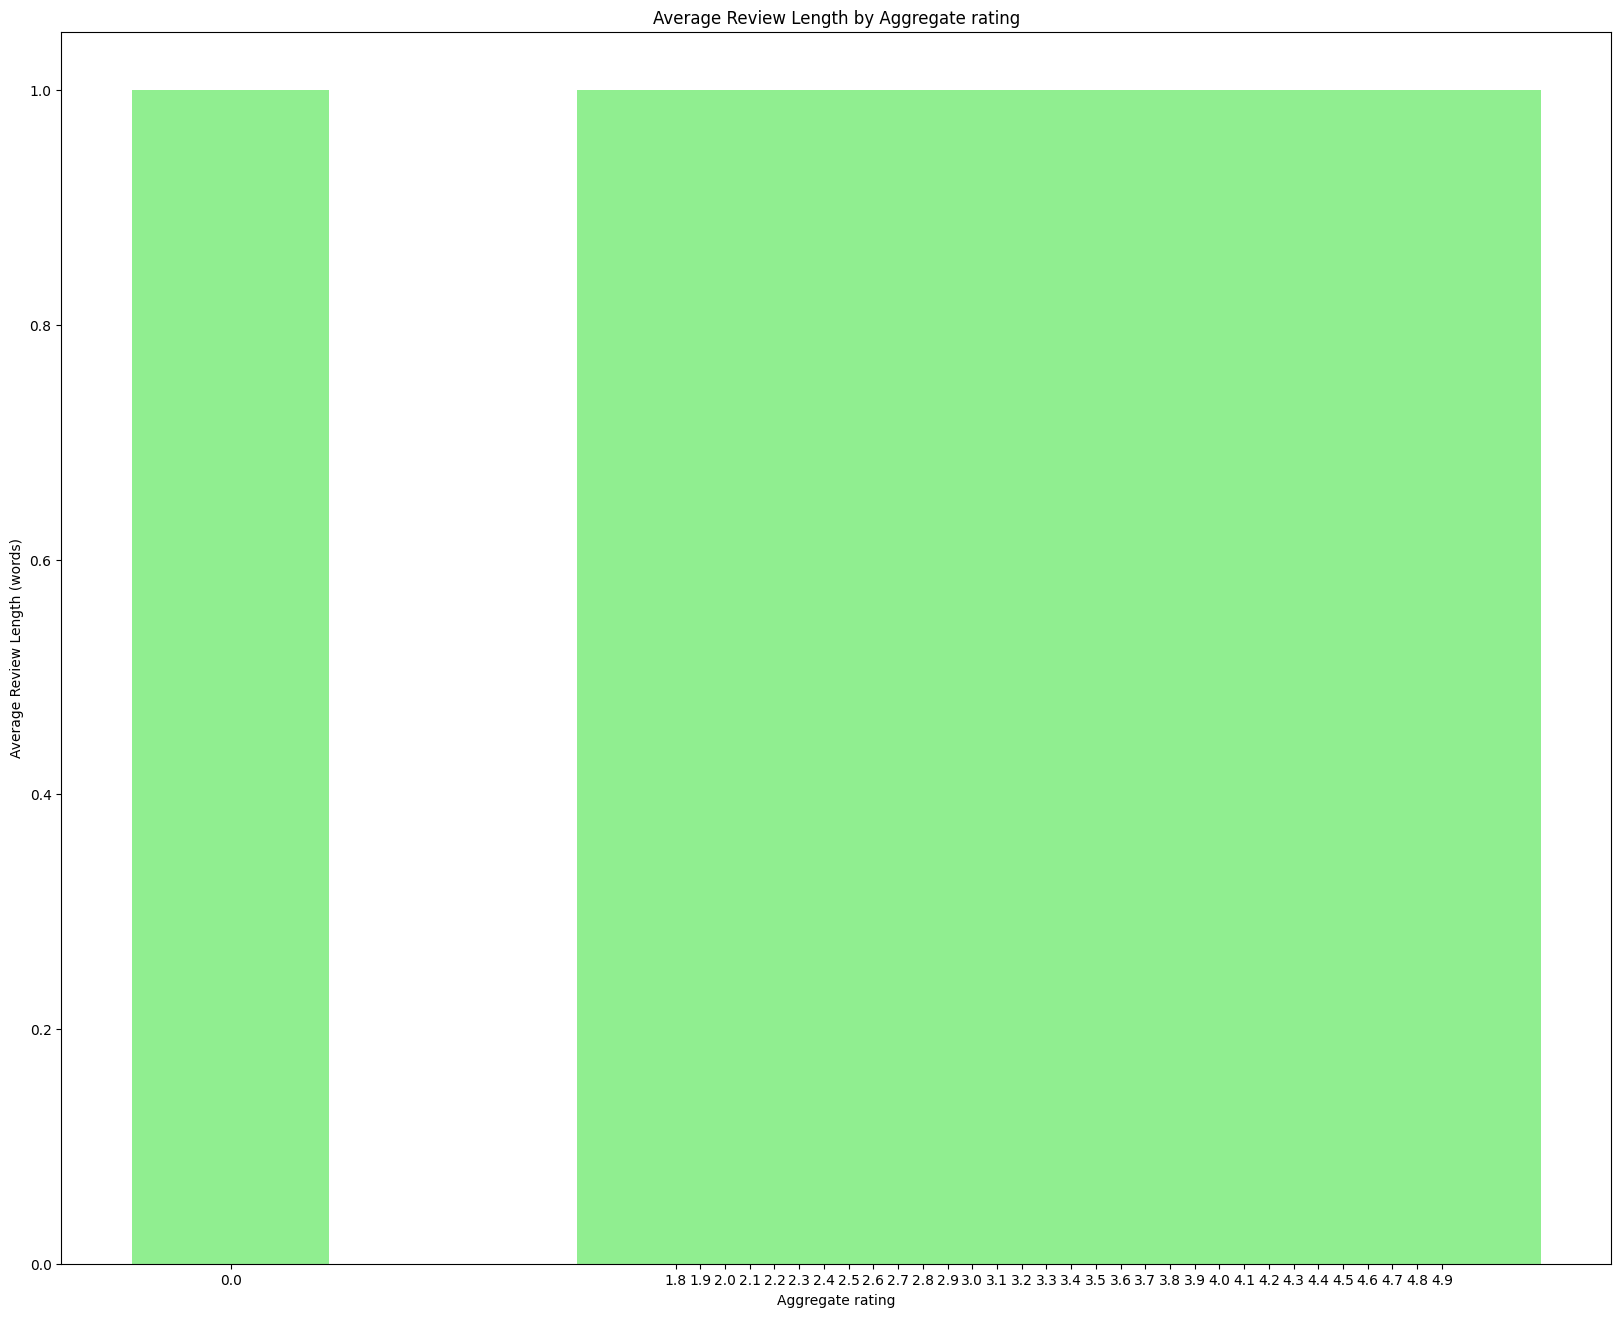

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')

file_path = '/content/Dataset .csv'
data = pd.read_csv(file_path)

data.dropna(subset=['Rating text', 'Aggregate rating'], inplace=True)

data['Rating text_processed'] = data['Rating text'].str.lower().str.split()

stop_words = set(stopwords.words('english'))
data['Rating text_processed'] = data['Rating text_processed'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

all_words = [word for review in data['Rating text_processed'] for word in review]

word_freq = Counter(all_words)

print("Most Common Words:")
print(word_freq.most_common(10))

positive_words = ['good', 'excellent', 'great', 'delicious', 'amazing', 'perfect', 'love', 'tasty', 'fantastic']
negative_words = ['bad', 'horrible', 'worst', 'disappointing', 'poor', 'terrible', 'awful', 'bland', 'not']

positive_count = sum([word_freq[word] for word in positive_words if word in word_freq])
negative_count = sum([word_freq[word] for word in negative_words if word in word_freq])

print(f"Total Positive Word Count: {positive_count}")
print(f"Total Negative Word Count: {negative_count}")

data['review_length'] = data['Rating text_processed'].apply(len)

avg_review_length = data['review_length'].mean()
print(f"Average Review Length: {avg_review_length:.2f} words")

Aggregate_rating_review_length = data.groupby('Aggregate rating')['review_length'].mean().reset_index()

plt.figure(figsize=(20, 16))
plt.bar(Aggregate_rating_review_length['Aggregate rating'], Aggregate_rating_review_length['review_length'], color='lightgreen')
plt.title('Average Review Length by Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Average Review Length (words)')
plt.xticks(Aggregate_rating_review_length['Aggregate rating'])
plt.show()
